# Single Curve Reconstruction

In [1]:
import sys
sys.path.insert(0, "../")

import numpy as np
from matplotlib import pyplot as plt
from skimage.morphology import dilation, disk

from curve_reconstruction.linear_model import LinearModel
from curve_reconstruction.irls import IRLS

### Generate line with outliers

In [2]:
# Parameters
w,h = 100,100          # image width and height
sigma = 1              # gaussian noise scale
a1_0, a1_1 = 30, 0.5   # line intercept and slope

# Generate line
A = [[a1_0, a1_1]]
model_init = LinearModel('line', A)
x = np.arange(w)
y = model_init.predict(x,scale=sigma)
y = list(map(int,y))

# Generate image
im = np.zeros((h,w), dtype=bool)
im[y,x] = 1
# add outlier
im[10:15,80:85] = 1
im = dilation(im,disk(1))

### Ordinary Least Square Fitting

In [4]:
# Model data
y_im, x_im = im.nonzero()
X_im = model_init.basis_functions(x_im)
# OLS Parameters estimation
a_ols = np.dot(np.dot(np.linalg.inv(np.dot(X_im.T,X_im)), X_im.T), y_im)
# Curve reconstruction
model_ols = LinearModel('line', [a_ols])
y_ols = model_ols.predict(x)

#### Plot Results

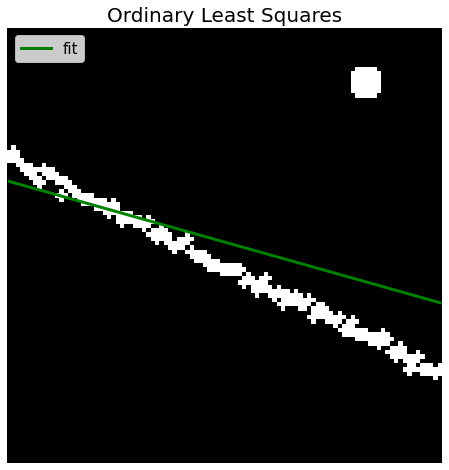

In [5]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
ax.imshow(im,cmap='gray')
ax.plot(x,y_ols,'-g',lw=3,label='fit')

ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Ordinary Least Squares', fontsize=20)
ax.legend(loc='upper left', fontsize=15)

### Iterative Reweighted Least Squares

In [6]:
# Initial parameters: horizontal line
a0_0, a0_1 = 50, 0
A_0 = [a0_0, a0_1]
model_init = LinearModel('line', [A_0])
y_init = model_init.predict(x)

In [7]:
# Select a noise model from Table 1 of Tarel et al. 2002, and scale suitable for the problem
noise_model = 'cauchy'
scale = 5
A_irls = IRLS(X_im,y_im,A_0,noise_model,scale)
# Curve reconstruction
model_irls = LinearModel('line', [A_irls])
y_irls = model_irls.predict(x)

#### Plot results

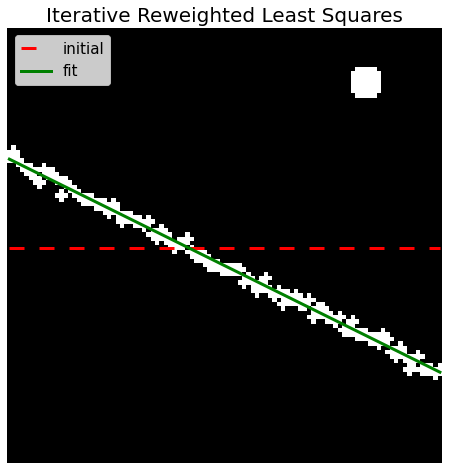

In [9]:
fig,ax = plt.subplots(1,1, figsize=(8,8))
ax.imshow(im,cmap='gray')
l1 = ax.plot(x,y_init,'-r',lw=3, linestyle='--', dashes=(5,5), label='initial')
l2 = ax.plot(x,y_irls,'-g',lw=3, label='fit')

ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Iterative Reweighted Least Squares', fontsize=20)
ax.legend(loc='upper left', fontsize=15)